In [16]:
from datasets import *

from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import QuantumInstance  #
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
import qiskit.tools.jupyter  

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.INFO)  # choose INFO, DEBUG to see the log

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.004, plot_data=True):

    # setup marker generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    if plot_data:
        # plot all samples                              
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                        alpha=0.8, c=colors[idx],
                        marker=markers[idx], label=cl)

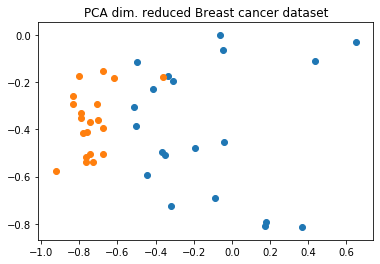

In [9]:
sample_Total, training_input, test_input, class_labels = Breast_cancer(
    training_size=20,
    test_size=10,
    n=2,
    PLOT_DATA=True
)

In [12]:
backend = BasicAer.get_backend('qasm_simulator')

seed = 10598

feature_map = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed, skip_qobj_validation=False)


2020-01-06 19:19:56,064:qiskit.aqua.components.feature_maps.pauli_expansion:INFO: Pauli terms include: ['IZ', 'ZI', 'ZZ']
2020-01-06 19:19:56,068:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.10.0
Backend: 'qasm_simulator (BasicAer)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'id', 'unitary'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: None


In [13]:
result = qsvm.run(quantum_instance)

print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.8


kernel matrix during the training:


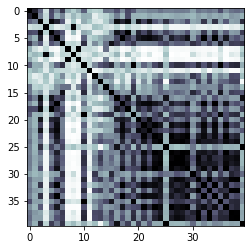

In [14]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

In [19]:
train = split_dataset_to_data_and_labels(training_input)
test = split_dataset_to_data_and_labels(test_input)

X = train[0][0]
y = train[0][1]

t_X = test[0][0]
t_y = test[0][1]

In [20]:
result = qsvm.predict(t_X, quantum_instance)
result_train = qsvm.predict(X, quantum_instance)

In [37]:
accuracy = 1-((result + t_y) == 1).sum()/len(t_y)

print('Predicted:', result, '\nWhich was ', t_y)
print('Overall accuracy of:', accuracy)
print('Overall accuracy (with train points) of:', 1-((result_train + y) == 1).sum()/len(y))

0.8

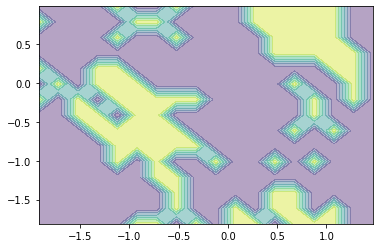

In [38]:
resolution = 0.2

# plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
Z = qsvm.predict(np.array([xx1.ravel(), xx2.ravel()]).T, quantum_instance)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.show()
